# Exploración de Datos y Predicción de falla cardíaca

Notebook de prueba para explorar y aprender el dataset sobre esta temática.

In [1]:
# Importo librerías
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# Obtengo los datos y muestro las primeras 10 filas
dataset = './heart_failure_clinical_records_dataset.csv'
heart_data = pd.read_csv(dataset)
heart_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## Features

- `age`: Edad del paciente
- `anaemia`: Disminución de glóbulos rojos o hemoglobina (booleano)
- `creatinine_phosphokinase`: Nivel de enzimas CPK en sangre (mcg/L)
- `diabetes`: Si el paciente tiene/tuvo diabetes (booleano)
- `ejection_fraction`: Porcentaje de sangre que sale del corazón en cada contracción (porcentaje)
- `high_blood_pressure`: Si el paciente tiene hipertensión (booleano)
- `platelets`: Plaquetas en sangre (kiloplatelets/mL)
- `serum_creatinine`: Nivel de creatinina sérica en sangre (mg/dL)
- `serum_sodium`: Nivel de sodio serica en sangre (mEq/L)
- `sex`: Mujer u hombre (booleano)
- `smoking`: Si el paciente fuma o no (booleano)
- `time`: Periodo de seguimiento (días)
- `DEATH_EVENT`: Si el paciente falleció durante el periodo de seguimiento (booleano)

## Las patologías son un indicador de falla cardíaca?

In [3]:
def pathologies_cases(data, feature: str, event: int) -> list:
    '''
    A partir de los datos obtenidos por el dataset, filtro los features 
    según si existió un evento de fallecimiento o no. Retorno una lista 
    con la cantidad por feature en cada evento.
    '''
    data_feature = data[data["DEATH_EVENT"]==event][feature]
    idx = pd.Index(data_feature)
    return list(idx.value_counts())

In [4]:
def plot_data(data: dict, index: list, kind='pie') -> None:
    '''
    Realizo los gráficos según el tipo de plot, mostrando los datos de un diccionario y un index.
    '''
    df_pathologies = pd.DataFrame(data, index=index)
    ax = df_pathologies.plot(kind=kind, rot=0, figsize=(20, 5), subplots=True, fontsize=13,
                             autopct='%1.1f%%', colors=['gold', 'dodgerblue'])

In [5]:
# Elijo features de interés para un primer análisis
pathologies_feat = ["anaemia", "diabetes", "high_blood_pressure", "smoking"]

# Obtengo sobrevivientes y fallecidos con las patologías seleccionadas
p_surv = {f: pathologies_cases(data=heart_data, feature=f, event=0) for f in pathologies_feat}
p_dead = {f: pathologies_cases(data=heart_data, feature=f, event=1) for f in pathologies_feat}

p_dead # Cada feature muestra cantidad de 1 y 0 (tuvo o no tuvo dicha patologia)

{'anaemia': [50, 46],
 'diabetes': [56, 40],
 'high_blood_pressure': [57, 39],
 'smoking': [66, 30]}

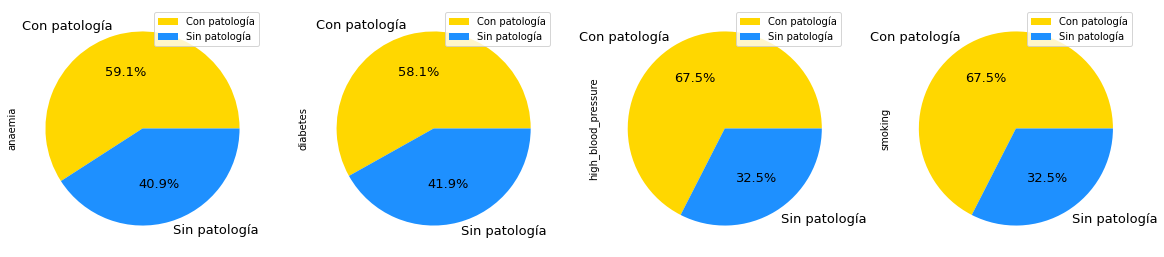

In [6]:
# 1er plot tipo torta para los pacientes que sobrevivieron a un fallo cardíaco
plot_data(data=p_surv, index=['Con patología', 'Sin patología'])

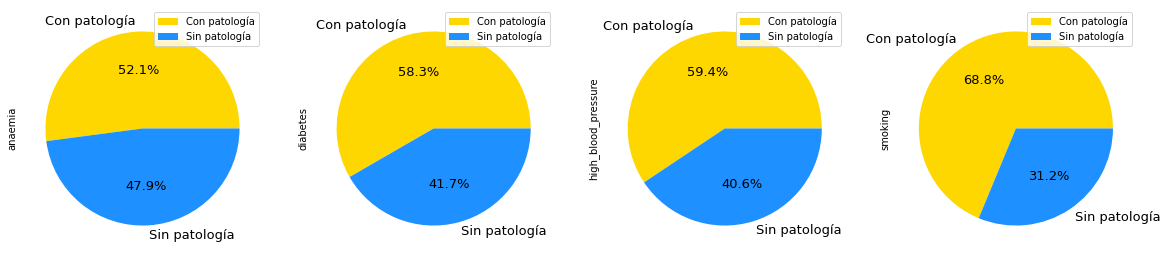

In [7]:
# 2do plot tipo torta para los pacientes que fallecieron debido al fallo cardíaco
plot_data(data=p_dead, index=['Con patología', 'Sin patología'])

## Matriz de Correlación

<AxesSubplot:>

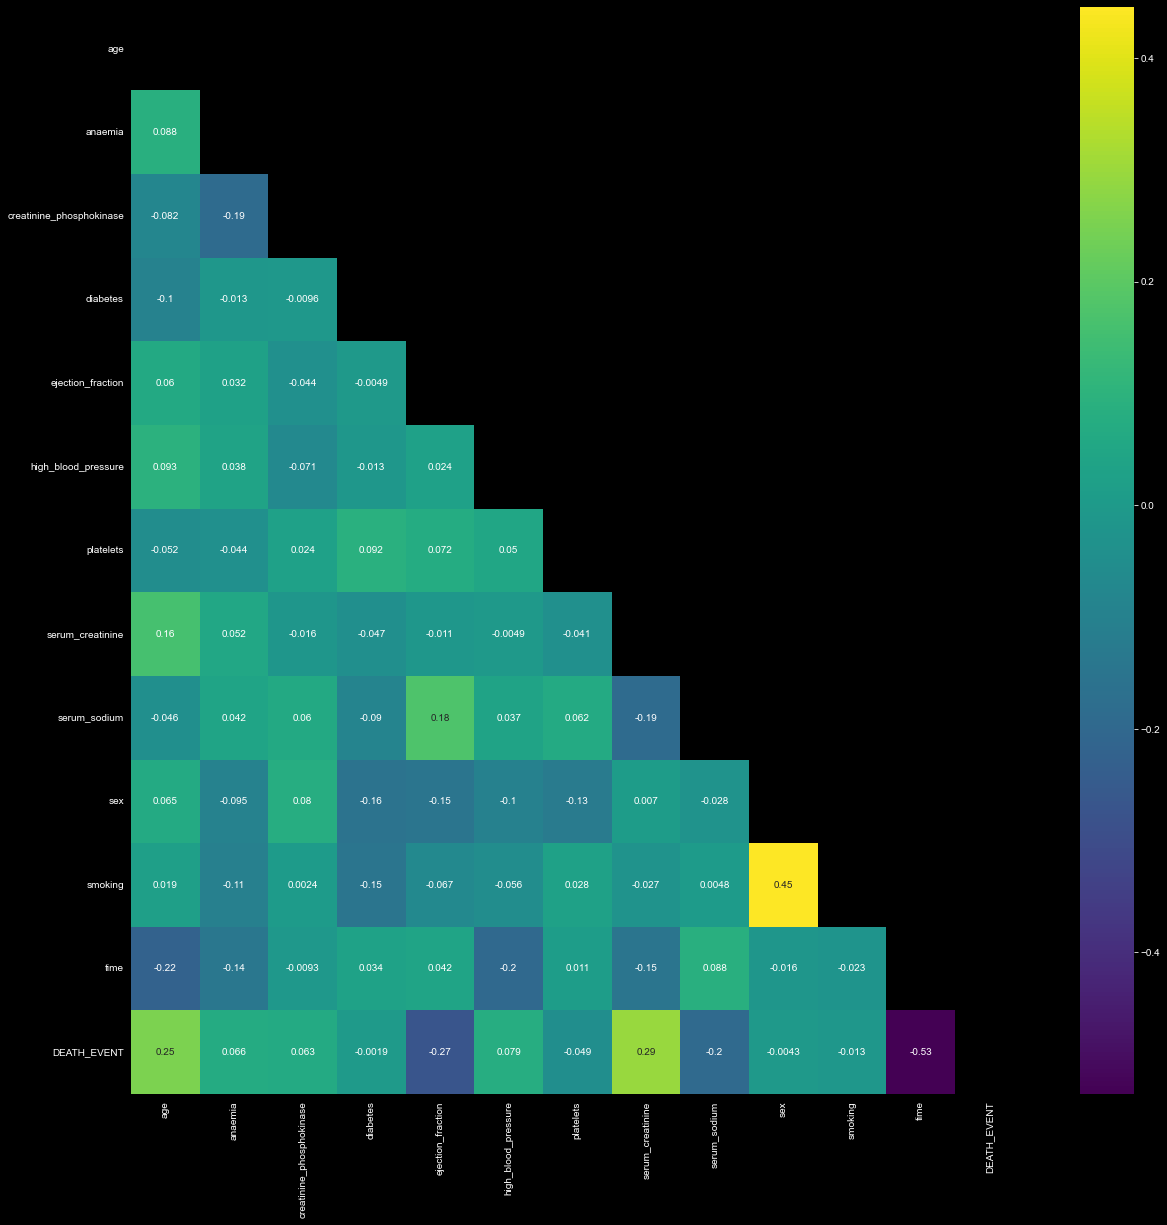

In [8]:
sns.set_style("dark")
plt.style.use("dark_background")
matrix_corr = heart_data.corr()
mask = np.zeros_like(matrix_corr)
mask[np.triu_indices_from(mask)] = True
fig,ax = plt.subplots(figsize=(20,20))
sns.heatmap(matrix_corr,mask=mask,annot=True,cmap="viridis")

## Relación Patologías con #Muertos

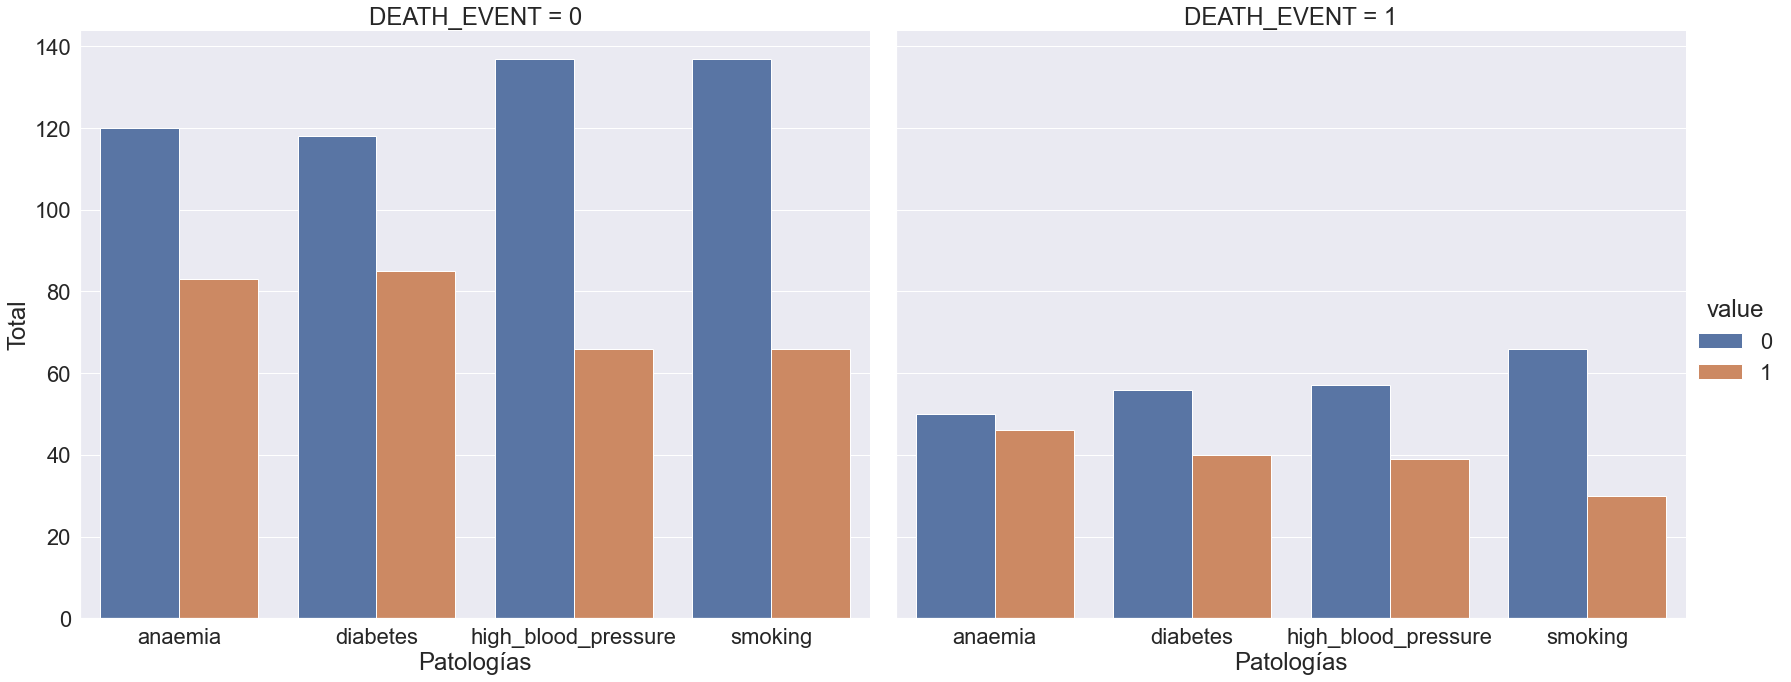

In [9]:
df = heart_data.copy()
df_pathologies = df.drop(columns=['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'time'])
df_melted = pd.melt(df_pathologies,id_vars="DEATH_EVENT")
sns.set(font_scale = 2)
fig = sns.catplot(data=df_melted,hue="value",x="variable",col="DEATH_EVENT",kind="count",height=10,aspect=1.2)
fig.set_axis_labels("Patologías", "Total")

## Distribución según cantidad de Patologías simultaneas

<Figure size 720x432 with 0 Axes>

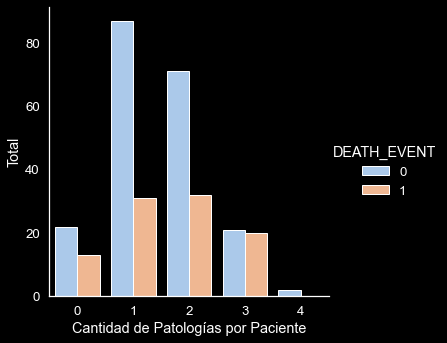

In [10]:
df_tendencia = df_pathologies.copy()
df_tendencia["#Pathologies"] = df["anaemia"]+df["diabetes"]+df["high_blood_pressure"]+df["smoking"]
df_tendencia.drop(columns=["anaemia","diabetes","high_blood_pressure","smoking"],inplace=True)
sns.set(font_scale = 1.2)
plt.figure(figsize=(10, 6))
sns.set_style("dark")
plt.style.use("dark_background")
fig = sns.catplot(data=df_tendencia,hue="DEATH_EVENT",x="#Pathologies",kind="count",height=5,palette="pastel")
fig.set_axis_labels("Cantidad de Patologías por Paciente", "Total")